In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.datasets import make_multilabel_classification
import tensorflow.keras.backend as K


In [ ]:

# generate fake data 
X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=5, n_labels=2, random_state=1)
data = X


In [ ]:
X.shape, y.shape

((10000, 10), (10000, 5))

In [ ]:
np.sum(y, axis = 0)

array([5163, 6406,  339, 4442, 2893])

In [ ]:
y[:10,:]

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0]])

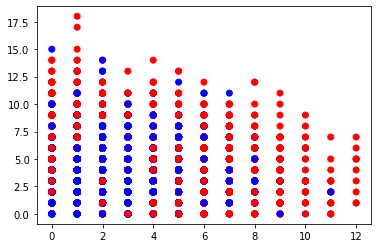

In [ ]:
y_col = 1
x_col_1 = 0
x_col_2 = 2


ycolor = y[:, y_col]
colormap = np.array(['r', 'b'])

plt.scatter(X[:, x_col_1], X[:, x_col_2], c=colormap[ycolor])

In [ ]:

# idenfify number of data 
N_samples = data.shape[0]
N_to_train = int(N_samples * 0.7) # 70% to train
N_to_valid = int(N_samples * 0.8) # 10% for validation


In [ ]:

# randomise data
shuffle_data = [x for x in np.random.permutation(N_samples)]
data = data[shuffle_data,:]
y = y[shuffle_data]

In [ ]:

# Data preparation data -> test, validation, test
data_train = data[:N_to_train,:]
y_train = y[:N_to_train]
data_train.shape

data_val = data[N_to_train:N_to_valid,:]
y_val = y[N_to_train:N_to_valid]
data_val.shape

data_test = data[N_to_valid:,:]
y_test = y[N_to_valid:]
data_test.shape


(2000, 10)

In [ ]:

# some model: multilayer perceptron
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5, activation = 'sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.BinaryAccuracy()])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 32)                352       
                                                                 
 batch_normalization_20 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_59 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,093
Trainable params: 1,029
Non-trainable params: 64
__________________________________________________

In [ ]:
model(np.random.random((1, 10)))

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.29174504, 0.5113457 , 0.51734084, 0.3222154 , 0.50933605]],
      dtype=float32)>

In [ ]:


# estimating model parameters
epochs_number = 100
history = model.fit(x = data_train, y = y_train, 
                    epochs=epochs_number, 
                    batch_size = 128,
                    validation_data = (data_val, y_val)
                    )



Epoch 1/100
55/55 [==============================] - 1s 9ms/step - loss: 0.6346 - binary_accuracy: 0.6589 - val_loss: 0.4652 - val_binary_accuracy: 0.8064
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 0.4827 - binary_accuracy: 0.7748 - val_loss: 0.4072 - val_binary_accuracy: 0.8222
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 0.4330 - binary_accuracy: 0.8020 - val_loss: 0.3857 - val_binary_accuracy: 0.8228
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 0.4086 - binary_accuracy: 0.8099 - val_loss: 0.3781 - val_binary_accuracy: 0.8254
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 0.4006 - binary_accuracy: 0.8114 - val_loss: 0.3735 - val_binary_accuracy: 0.8266
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 0.3993 - binary_accuracy: 0.8130 - val_loss: 0.3727 - val_binary_accuracy: 0.8290
Epoch 7/100
55/55 [==============================] - 0s 7ms/step - los

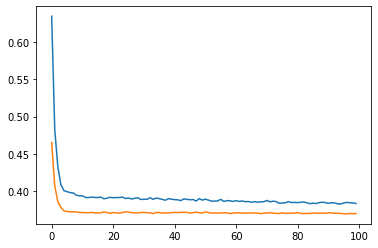

In [ ]:

# plot loss of model
epochs = [i for i in range(epochs_number)]
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.show()


In [ ]:


# test model on unseen (test) data
predictions = model.predict(data_test)
predictions
predicted_classes = np.round(predictions > 0.5)

multilabel_confusion_matrix(y_test, predicted_classes)


array([[[ 810,  181],
        [ 182,  827]],

       [[ 439,  320],
        [ 154, 1087]],

       [[1936,    2],
        [  62,    0]],

       [[ 946,  168],
        [ 244,  642]],

       [[1327,  106],
        [ 235,  332]]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1009
           1       0.77      0.88      0.82      1241
           2       0.00      0.00      0.00        62
           3       0.79      0.72      0.76       886
           4       0.76      0.59      0.66       567

   micro avg       0.79      0.77      0.78      3765
   macro avg       0.63      0.60      0.61      3765
weighted avg       0.78      0.77      0.77      3765
 samples avg       0.75      0.72      0.70      3765



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_classes

array([[1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1.],
       ...,
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.]], dtype=float16)

In [ ]:
np.round(predictions[:10,:],2)

array([[0.93, 0.55, 0.02, 0.4 , 0.66],
       [0.39, 0.96, 0.02, 0.18, 0.28],
       [0.36, 0.77, 0.02, 0.78, 0.69],
       [0.25, 0.89, 0.02, 0.51, 0.02],
       [0.49, 0.1 , 0.01, 0.66, 0.32],
       [0.16, 0.98, 0.03, 0.17, 0.15],
       [0.36, 0.14, 0.04, 0.95, 0.54],
       [0.97, 0.64, 0.07, 0.08, 0.1 ],
       [0.67, 0.57, 0.04, 0.63, 0.09],
       [0.47, 0.9 , 0.01, 0.25, 0.02]], dtype=float32)

In [ ]:
y_test[:10,:]

array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0]])